In [1]:
import os

import numpy as np
import pandas as pd
import time
pd.options.mode.chained_assignment = None
import math
import numpy as np
import copy
from datetime import datetime
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings('ignore')

In [80]:
bldgs = os.listdir('Consumption/Batch 2/')
bldg_id = [b.replace('-0.parquet', '') for b in bldgs]
AEC = {'TimeStamp':pd.read_parquet(f'Consumption/Batch 2/{bldgs[0]}', engine='pyarrow')['timestamp'].values}
for entry in bldgs:
    AEC[entry.replace('-0.parquet', '') + '-1'] = pd.read_parquet(f'Consumption/Batch 1/{entry}', engine='pyarrow')['out.electricity.total.energy_consumption'].values
    AEC[entry.replace('-0.parquet', '') + '-2'] = pd.read_parquet(f'Consumption/Batch 2/{entry}', engine='pyarrow')['out.electricity.total.energy_consumption'].values
AEC = pd.DataFrame(AEC)
AEC.to_csv('Consumption/TexasTravisConsumption15.csv', index=None)

In [81]:
data = pd.read_csv('Consumption/TexasTravisConsumption15.csv')

data['weekday'] = [datetime.strptime(data['TimeStamp'].iloc[i], "%Y-%m-%d  %H:%M:%S").weekday() + 1 for i in range(len(data))]
entries1 = [c for c in data.columns[1:-1] if '-1' in c]
entries2 = [c for c in data.columns[1:-1] if '-2' in c]
data['aggregation-1'] = sum(data[entry] for entry in entries1)
data['aggregation-2'] = sum(data[entry] for entry in entries2)


,TimeStamp,100529-1,100529-2,105426-1,105426-2,106513-1,106513-2,107017-1,107017-2,108529-1,...,171841-2,175922-1,175922-2,176658-1,176658-2,178170-1,178170-2,weekday,aggregation-1,aggregation-2
0,2018-01-01 00:15:00,1.073312,3.322575,1.389245,1.454875,2.154176,1.454875,1.755804,1.755804,2.735409,...,2.082745,1.969976,1.652228,1.669961,1.056696,1.433003,4.214691,1,80.911396,97.056556
1,2018-01-01 00:30:00,0.992012,3.106992,1.389245,1.899729,2.154772,1.899729,1.695100,1.695100,2.677650,...,2.082745,1.705082,1.659055,1.658965,1.056260,1.427120,3.956409,1,79.808870,96.296047
2,2018-01-01 00:45:00,1.156133,3.031283,1.389245,1.437063,2.155070,1.437063,1.672712,1.672712,2.648771,...,2.082745,2.095873,1.666278,1.653468,1.057019,1.407357,3.857878,1,79.695698,95.511102
3,2018-01-01 01:00:00,1.356424,2.994329,1.389245,1.428897,2.161874,1.428897,1.661519,1.661519,2.657979,...,2.082745,2.096092,1.673722,1.657344,0.932112,1.401919,3.768438,1,80.247893,95.397412
4,2018-01-01 01:15:00,1.266385,1.791975,1.389245,1.444205,2.154094,1.444205,2.260210,2.260210,5.044772,...,2.148847,2.080991,3.158830,1.657305,1.080246,2.201702,3.669907,1,93.846921,85.066040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,1.990249,5.381147,1.389245,1.785240,2.157602,1.785240,2.345146,2.345146,3.046729,...,2.082745,3.391398,1.509887,1.815699,1.457755,1.489504,6.366024,1,93.300190,108.716862
35036,2018-12-31 23:15:00,1.670077,4.720917,1.389245,2.251261,2.155682,2.251261,2.151986,2.151986,2.892736,...,2.082745,2.887487,1.514059,1.801148,1.074160,1.488134,5.710531,1,90.415105,105.132253
35037,2018-12-31 23:30:00,1.030209,4.390802,1.389245,1.728240,2.154722,1.728240,2.059364,2.059364,2.845609,...,2.082745,2.790577,1.536515,1.683512,1.063952,1.481584,5.344099,1,86.284352,101.242237
35038,2018-12-31 23:45:00,1.304213,3.959635,1.389245,2.102300,2.153282,2.102300,1.937929,1.937929,2.822046,...,2.082745,2.596758,1.645887,1.680124,1.060235,1.464995,4.908209,1,85.020555,100.862108


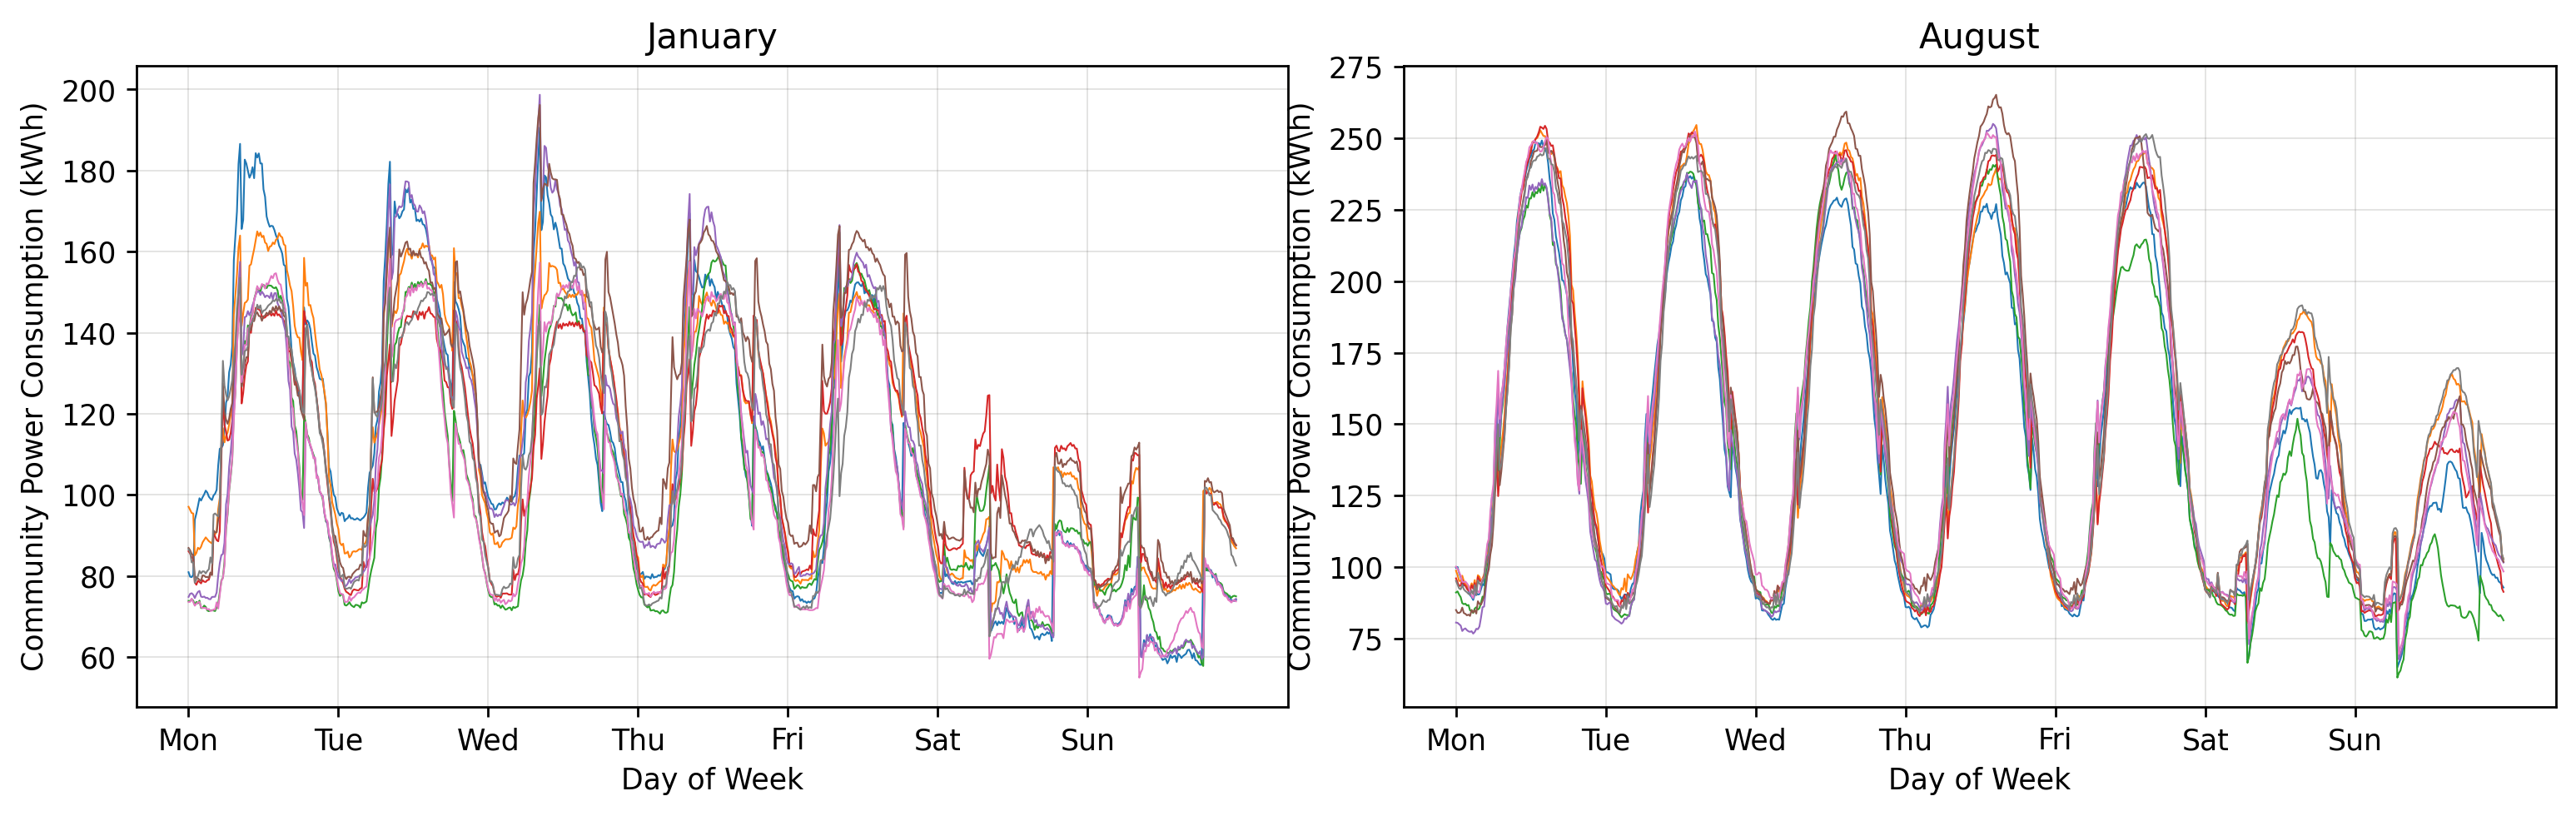

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=250)
h = 7*24*4
c = 4
j_start = (31+29+31+31+30+31+31)*24*4
for d in range(c):
    axs[0].plot(range(h), data['aggregation-1'].iloc[d*h: (d+1)*h], linewidth=0.6)
    axs[0].plot(range(h), data['aggregation-2'].iloc[d*h: (d+1)*h], linewidth=0.6)

while True:
    if data['weekday'].iloc[j_start] != 1:
        j_start -= 24*4
    else:
        break

for d in range(c):
    axs[1].plot(range(h), data['aggregation-1'].iloc[j_start + d*h: j_start + (d+1)*h], linewidth=0.6)
    axs[1].plot(range(h), data['aggregation-2'].iloc[j_start + d*h: j_start + (d+1)*h], linewidth=0.6)

axs[0].set_title('January')
axs[1].set_title('August')

axs[0].set_xticks([24*4*i for i in range(7)], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axs[1].set_xticks([24*4*i for i in range(7)], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

axs[0].set_xlabel('Day of Week')
axs[0].set_ylabel('Community Power Consumption (kW\h)')
axs[0].grid(color='#666362', linestyle='-', linewidth=0.1)

axs[1].set_xlabel('Day of Week')
axs[1].set_ylabel('Community Power Consumption (kW\h)')
axs[1].grid(color='#666362', linestyle='-', linewidth=0.1)
plt.subplots_adjust(wspace=0.1)
plt.savefig('IMG/Jan-Aug.jpg', bbox_inches='tight')

### Months Separation

In [83]:
months = {'Jan': 31, 'Feb': 29, 'Mar': 31, 'Apr': 30, 'May': 31, 'Jun': 30,
          'Jul': 31, 'Aug': 31, 'Aug': 30, 'Sep': 31, 'Oct': 30, 'Nov': 31}
all_months = {}
Start = 0
resolution = 24*4
for m in months:
    lenght = months[m]
    truncated = data.iloc[Start * resolution: (Start + lenght) * resolution]
    weekday = truncated[truncated['weekday'] < 6]
    weekend = truncated[truncated['weekday'] >= 6]
    wd = range(int(len(weekday)/resolution))
    we = range(int(len(weekend)/resolution))
    month_consumption = pd.DataFrame(index=range(resolution),
                                     columns=[f'weekday{j}-{i}' for i in (1, 2) for j in wd] +
                                             [f'weekend{j}-{i}' for i in (1, 2) for j in we])
    for j in wd:
        month_consumption[f'weekday{j}-1'] = weekday['aggregation-1'].iloc[j*resolution : (j+1)*resolution].values
        month_consumption[f'weekday{j}-2'] = weekday['aggregation-2'].iloc[j*resolution : (j+1)*resolution].values
    for j in we:
        month_consumption[f'weekend{j}-1'] = weekend['aggregation-1'].iloc[j*resolution : (j+1)*resolution].values
        month_consumption[f'weekend{j}-2'] = weekend['aggregation-2'].iloc[j*resolution : (j+1)*resolution].values
    Start += lenght
    all_months[m] = month_consumption

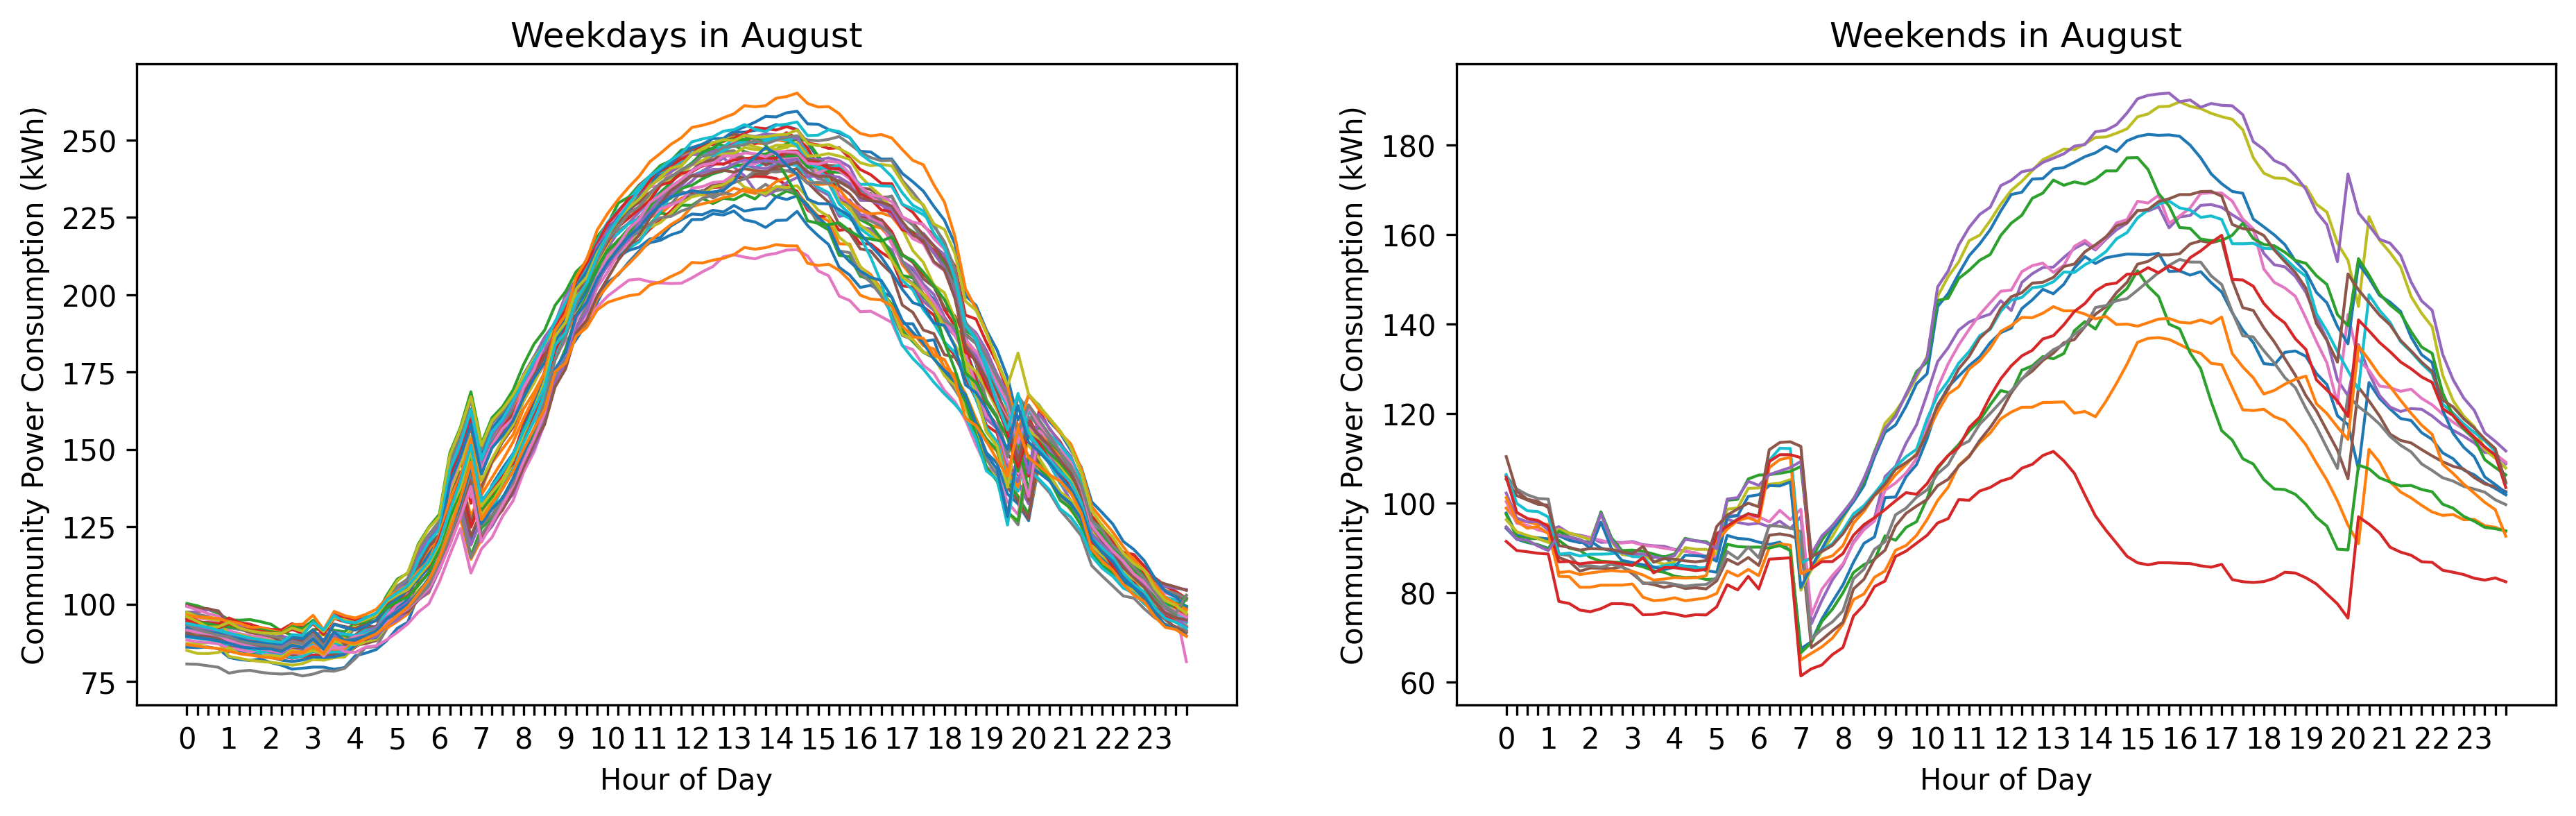

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=300)
for j in all_months['Aug'].columns:
    if 'weekday' in j:
        axs[0].plot(range(resolution), all_months['Aug'][j].values, linewidth=1)
    else:
        axs[1].plot(range(resolution), all_months['Aug'][j].values, linewidth=1)

axs[0].set_title('Weekdays in August')
axs[1].set_title('Weekends in August')

axs[0].set_xlabel('Hour of Day')
axs[1].set_xlabel('Hour of Day')

axs[0].set_ylabel('Community Power Consumption (kWh)')
axs[1].set_ylabel('Community Power Consumption (kWh)')

ticks = []
for i in range(resolution):
    if i%4 == 0:
        ticks.append(str(int(i/4)))
    else:
        ticks.append('')
axs[0].set_xticks(range(resolution), ticks)
axs[1].set_xticks(range(resolution), ticks)
plt.savefig('IMG/Weekday-Weekend-Aug.jpg', bbox_inches='tight')

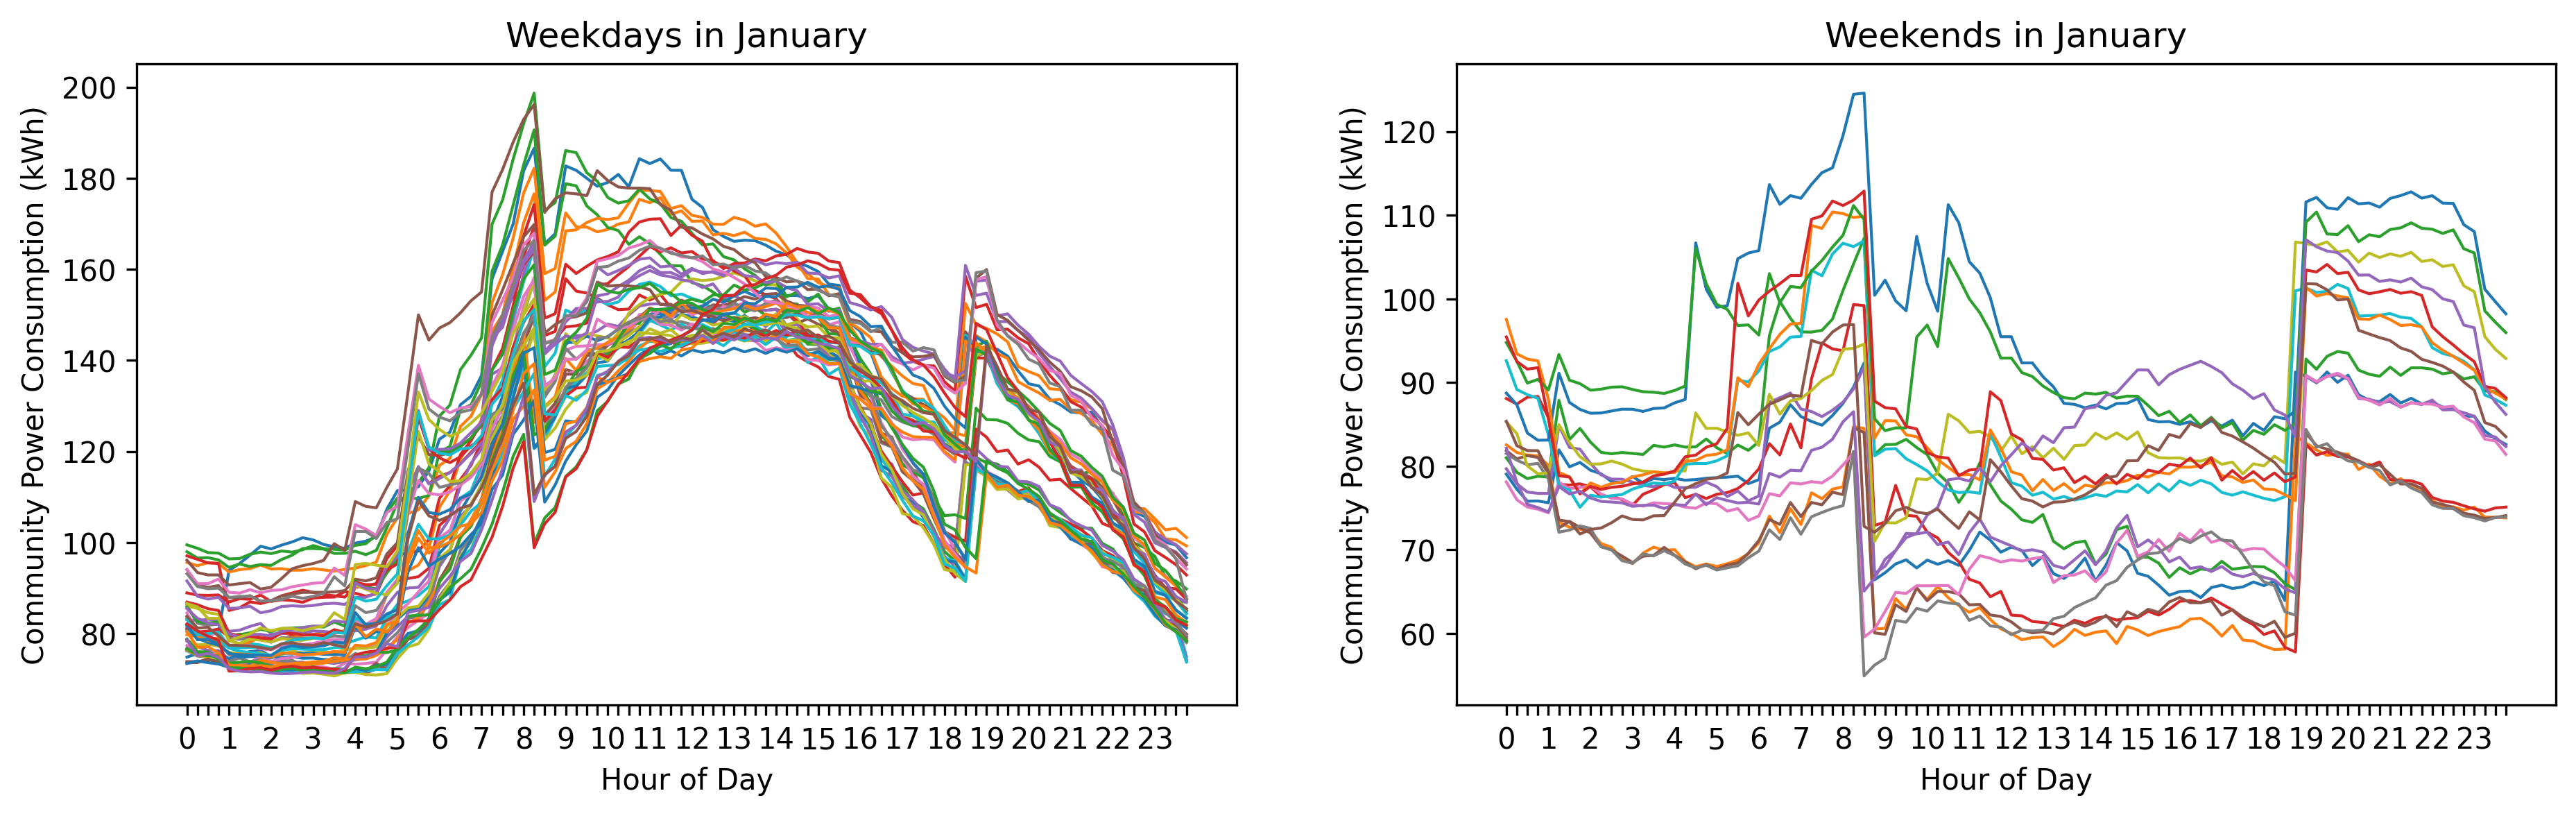

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=300)
for j in all_months['Jan'].columns:
    if 'weekday' in j:
        axs[0].plot(range(resolution), all_months['Jan'][j], linewidth=1)
    else:
        axs[1].plot(range(resolution), all_months['Jan'][j], linewidth=1)

axs[0].set_title('Weekdays in January')
axs[1].set_title('Weekends in January')

axs[0].set_xlabel('Hour of Day')
axs[1].set_xlabel('Hour of Day')

axs[0].set_ylabel('Community Power Consumption (kWh)')
axs[1].set_ylabel('Community Power Consumption (kWh)')

axs[0].set_xticks(range(resolution), ticks)
axs[1].set_xticks(range(resolution), ticks)
plt.savefig('IMG/Weekday-Weekend-Jan.jpg', bbox_inches='tight')

In [86]:
for m in months:
    weekday_list = [c for c in all_months[m].columns if 'weekday' in c]
    weekend_list = [c for c in all_months[m].columns if 'weekend' in c]

    counter = 1
    while counter <= 100:
        c1 = random.choice(weekday_list)
        while True:
            c2 = random.choice(weekday_list)
            if c2 != c1:
                break
        all_months[m][f'weekdayG-{counter}'] = 0.5*(all_months[m][c1].values + all_months[m][c2].values) + np.array([np.random.randn() for _ in all_months[m][c2].values])

        c1 = random.choice(weekend_list)
        while True:
            c2 = random.choice(weekend_list)
            if c2 != c1:
                break
        all_months[m][f'weekendG-{counter}'] = 0.5*(all_months[m][c1].values + all_months[m][c2].values) + np.array([np.random.randn() for _ in all_months[m][c2].values])
        counter += 1
    all_months[m].to_csv(f'ForGAN/{m}.csv')


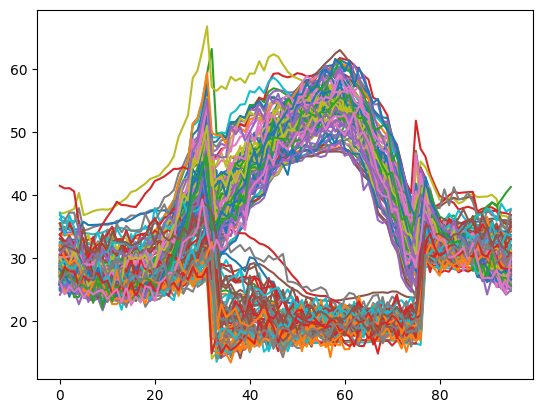

In [35]:
AEC = pd.read_csv('Consumption/TexasTravisConsumption15.csv')
AEC_hourly = pd.DataFrame(index=range(365*24*2), columns=AEC.columns)
entries = AEC_hourly.columns[1:]
for r in range(len(AEC)):
    if r%2 == 0:
        row = int(r / 2)
        AEC_hourly['TimeStamp'].iloc[row] = AEC['TimeStamp'].iloc[r]
        for e in entries:
            AEC_hourly[e].iloc[row] = AEC[e].iloc[r] + AEC[e].iloc[r+1] + AEC[e].iloc[r+2] + AEC[e].iloc[r+3]


income = pd.read_csv('../area_median_income_and_income_lookup.csv')
income_list = []

for b in bldg_id:
    income_list.append(income[income['bldg_id'] == int(b)]['in.household_income'].iloc[0])

plt.figure(figsize=(8, 5), dpi=300)
plt.hist(income_list, bins=20, color='orange')
plt.xlabel('Simulated Data Annual Income')
plt.ylabel('Frequency')
plt.title(f'Median Income: Survey(\$37500.0) - Simulated(\${np.median(income_list):0.1f})')
